### Applying K-Nearest Neighbors
Let's examine how to create a KNN classifier model.

In [1]:
# importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,7

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [4]:
df.shape

(400, 5)

In [5]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=True, dtype=int)

In [8]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [9]:
y = df.Purchased

In [10]:
X = df.drop(['Purchased', 'User ID'], axis = 1)

In [11]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaler.fit(X)

StandardScaler()

In [15]:
scaled_features = scaler.transform(X)
scaled_features

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [16]:
df_feat = pd.DataFrame(scaled_features, columns=X.columns)

In [17]:
df_feat.head()

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, y)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(300, 3)
(300,)
(100, 3)
(100,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score

In [22]:
logReg = LogisticRegression(multi_class='ovr', solver='liblinear')

In [23]:
model_lr = logReg.fit(X_train, y_train)

In [24]:
y_pred = model_lr.predict(X_test)

In [25]:
lr_acc = accuracy_score(y_test, y_pred)

<Axes: >

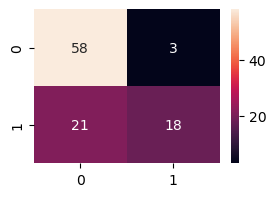

In [26]:
plt.figure(figsize=(3,2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

              precision    recall  f1-score   support

           0       0.73      0.95      0.83        61
           1       0.86      0.46      0.60        39

    accuracy                           0.76       100
   macro avg       0.80      0.71      0.71       100
weighted avg       0.78      0.76      0.74       100



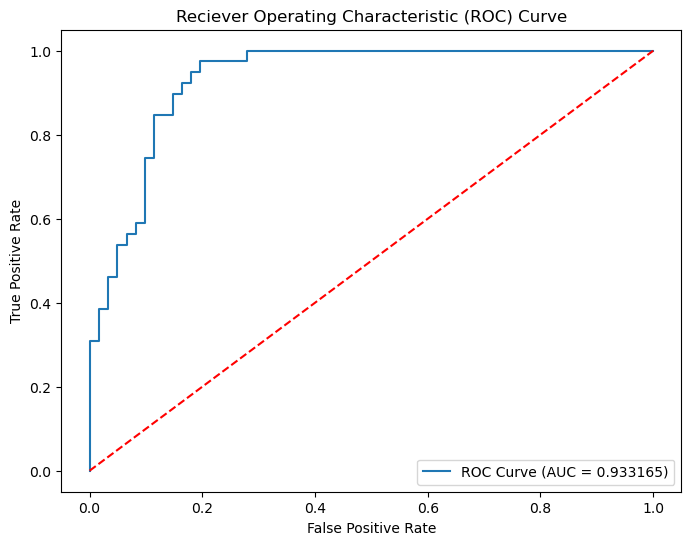

In [27]:
print(classification_report(y_test, y_pred))

# ROC Curve
proba = model_lr.predict_proba(X_test)
proba_class1 = proba[:,1] # prob of positive class

fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
roc_auc = roc_auc_score(y_test, proba_class1)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:2f})')
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
dt_pred = dt.predict(X_test)

In [32]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85        61
           1       0.83      0.64      0.72        39

    accuracy                           0.81       100
   macro avg       0.82      0.78      0.79       100
weighted avg       0.81      0.81      0.80       100



In [33]:
dt_acc = accuracy_score(y_test, dt_pred)

#### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=30)

In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [37]:
rf_pred = rf.predict(X_test)

In [38]:
rf_acc = accuracy_score(y_test, rf_pred)

In [39]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        61
           1       0.88      0.72      0.79        39

    accuracy                           0.85       100
   macro avg       0.86      0.83      0.84       100
weighted avg       0.85      0.85      0.85       100



#### K Nearest Neighbors

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
knn = KNeighborsClassifier(n_neighbors=1)

In [42]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [43]:
knn_pred = knn.predict(X_test)

In [44]:
knn_proba = knn.predict_proba(X_test)

In [45]:
knn_proba_class1 = knn_proba[:,1]
knn_proba_class1

array([0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.])

In [46]:
fpr, tpr, thresholds = roc_curve(y_test, knn_proba_class1)

In [47]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.08196721 1.        ]
[0.         0.69230769 1.        ]
[inf  1.  0.]


In [48]:
roc_auc = roc_auc_score(y_test, knn_proba_class1)
roc_auc

0.8051702395964692

In [49]:
from sklearn import metrics

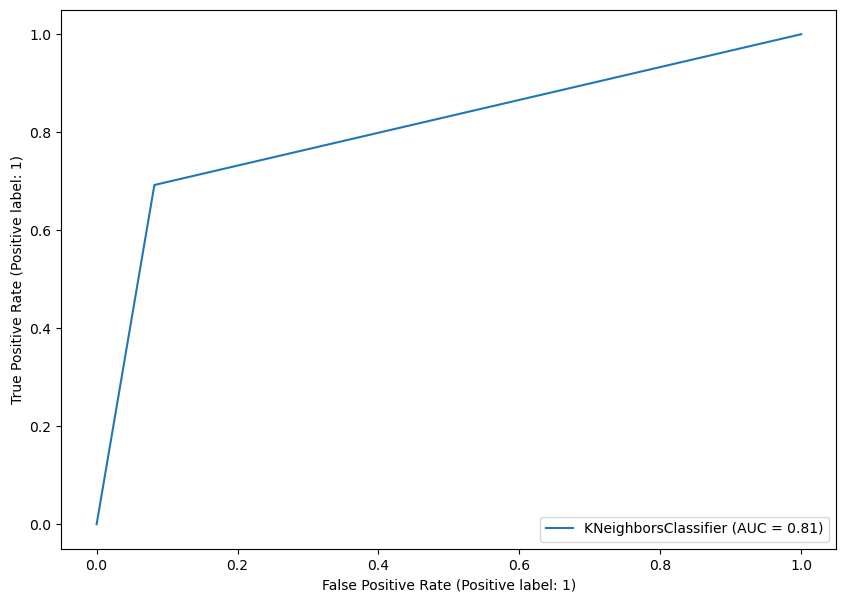

In [50]:
metrics.RocCurveDisplay.from_estimator(knn, X_test, y_test, drop_intermediate=False)

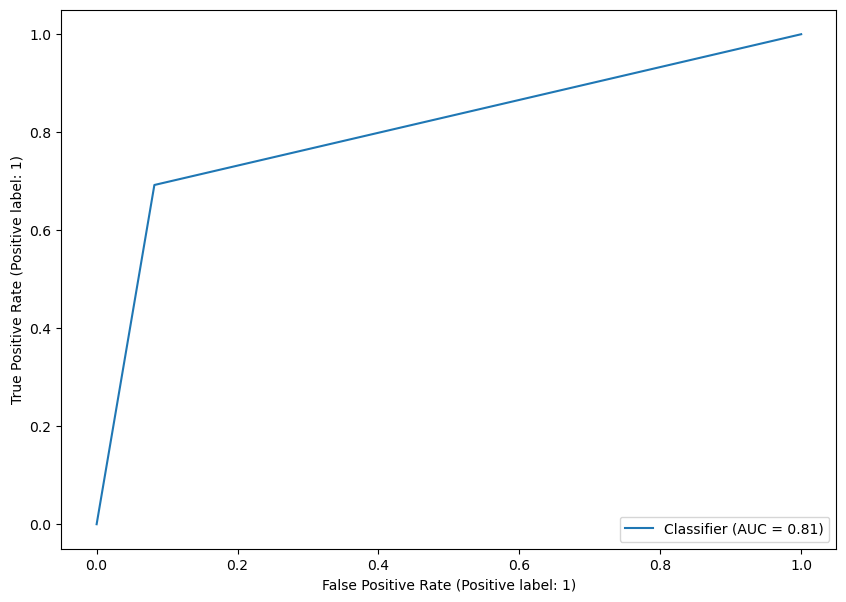

In [51]:
metrics.RocCurveDisplay.from_predictions(y_test, knn_pred)

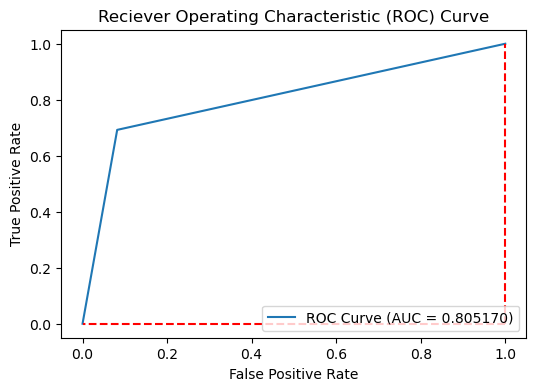

In [52]:
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:2f})')
plt.plot([1,1], [0,1], 'r--')
plt.plot([1,0], [0,0], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [53]:
knn_acc = accuracy_score(y_test, knn_pred)

In [54]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        61
           1       0.84      0.69      0.76        39

    accuracy                           0.83       100
   macro avg       0.83      0.81      0.81       100
weighted avg       0.83      0.83      0.83       100



#### Naive Bayes' Classifier

In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
nb = GaussianNB()

In [57]:
nb.fit(X_train, y_train)

GaussianNB()

In [58]:
nb_pred = nb.predict(X_test)

In [59]:
nb_acc = accuracy_score(y_test, nb_pred)

#### Support Vector Classifier

In [60]:
from sklearn.svm import SVC

In [61]:
svc = SVC()

In [62]:
svc.fit(X_train, y_train)

SVC()

In [63]:
svc_pred = svc.predict(X_test)

In [64]:
svm_acc = accuracy_score(y_test, svc_pred)

In [65]:
# Comparison Matrix
from tabulate import tabulate

In [67]:
# comparision of the matrix between All the above classification models
model_table = pd.DataFrame(columns = ["Comparison Matrix", "Accuracy"])
model_table["Comparison Matrix"] = ["Logistic Regression", "Decision Tree", "Random Forest","Naive Bayes'",
                                    "Support Vector Classifier", "KNN Classifier"]
model_table["Accuracy"] = [lr_acc, dt_acc, rf_acc, nb_acc, svm_acc, knn_acc]

print(tabulate(model_table, headers = "keys", tablefmt = "psql", numalign = "right"))

+----+---------------------------+------------+
|    | Comparison Matrix         |   Accuracy |
|----+---------------------------+------------|
|  0 | Logistic Regression       |       0.76 |
|  1 | Decision Tree             |       0.81 |
|  2 | Random Forest             |       0.85 |
|  3 | Naive Bayes'              |       0.82 |
|  4 | Support Vector Classifier |       0.88 |
|  5 | KNN Classifier            |       0.83 |
+----+---------------------------+------------+


END